# Singular value decomposition

The SVD of a $m \times n$ matrix $A$ is

$$
A = U \Sigma V^\star
$$

We use [numpy.linalg.svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) or [scipy.linalg.svd](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) to compute this. Below we use numpy.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

Construct a random $3 \times 2$ matrix.

In [25]:
A = 2 * np.random.rand(3,2) - 1

## Reduced SVD

The reduced SVD is given by

```
U,S,Vh = np.linalg.svd(A, full_matrices=False)
```

The function returns $\textrm{Vh} = V^\star$.

The singular vectors and values are given by

\begin{align*}
u_j &= \textrm{U[:,j]}, & 0 \le j < n \\
v_j &= \textrm{Vh[j,:]}, & 0 \le j < n \\
\sigma_j &= \textrm{S[j]}, & 0 \le j < n
\end{align*}

In [26]:
U,S,Vh = np.linalg.svd(A, full_matrices=False)
print('U = \n', U)
print('sigma = ', *S)
print('V = \n', Vh.T)

U = 
 [[ 0.16482124  0.90554822]
 [-0.48858867  0.41925307]
 [-0.85680516 -0.06487906]]
sigma =  0.6511960681451465 0.12091614067200726
V = 
 [[ 0.04946146  0.99877603]
 [ 0.99877603 -0.04946146]]


$U$ is $m \times n$ and $V$ is $n \times n$. We can verify that $A = U \Sigma V^\star$ by computing the element-wise maximum difference

In [27]:
print(np.abs(A - U@np.diag(S)@Vh).max())

1.1102230246251565e-16


## Full SVD

The full SVD is given by

```
U,S,Vh = np.linalg.svd(A, full_matrices=True)
```

The singular vectors and values are given by

\begin{align*}
u_j &= \textrm{U[:,j]}, & 0 \le j < m \\
v_j &= \textrm{Vh[j,:]}, & 0 \le j < n \\
\sigma_j &= \textrm{S[j]}, & 0 \le j < n
\end{align*}

In [28]:
U,S,Vh = np.linalg.svd(A, full_matrices=True)
print('U = \n', U)
print('sigma = ', *S)
print('V = \n', Vh.T)

U = 
 [[ 0.16482124  0.90554822  0.39091736]
 [-0.48858867  0.41925307 -0.76518493]
 [-0.85680516 -0.06487906  0.51154241]]
sigma =  0.6511960681451465 0.12091614067200726
V = 
 [[ 0.04946146  0.99877603]
 [ 0.99877603 -0.04946146]]


$U$ is $m \times m$ and $V$ is $n \times n$.

## Rank deficient case

Construct a random $4 \times 3$ matrix whose last column is sum of first two columns. Its rank is 2.

In [29]:
A = 2 * np.random.rand(4,3) - 1
A[:,2] = A[:,0] + A[:,1]

Compute the reduced SVD

In [30]:
U,S,Vh = np.linalg.svd(A, full_matrices=False)
print('U = \n', U)
print('sigma = ', *S)
print('V = \n', Vh.T)

U = 
 [[-0.73395838 -0.12517813 -0.33579402]
 [-0.10903625 -0.41879931  0.85985282]
 [-0.54752869 -0.33771886  0.00725199]
 [-0.38681846  0.83359675  0.38450346]]
sigma =  1.9921183552558448 1.0565545201910542 1.431644719927487e-17
V = 
 [[ 0.3000202  -0.75937773 -0.57735027]
 [ 0.50763031  0.63951399 -0.57735027]
 [ 0.80765051 -0.11986375  0.57735027]]


We notice that one out of three singular values is zero. The number of non-zero singular values corresponds to the rank of the matrix.

## Random matrix

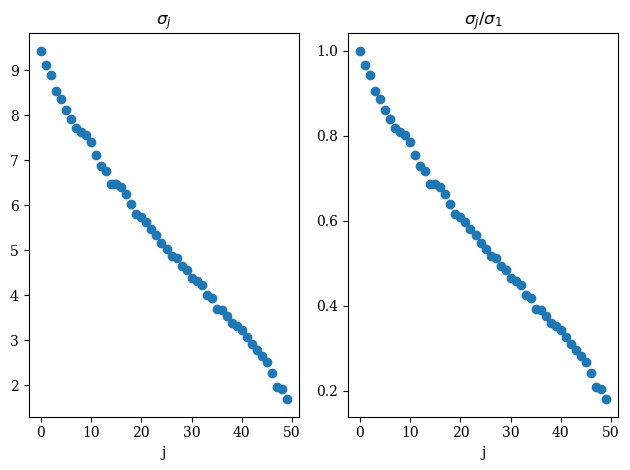

In [31]:
m, n = 100, 50
A = 2 * np.random.rand(m,n) - 1
U,S,Vh = np.linalg.svd(A, full_matrices=False)

plt.subplot(121)
plt.plot(S,'o')
plt.xlabel('j')
plt.title('$\\sigma_j$')

plt.subplot(122)
plt.plot(S/S[0],'o')
plt.xlabel('j')
plt.title('$\\sigma_j/\\sigma_1$');

All singular values are of very similar size.